In [3]:
import sep
from astropy.io import fits
from astropy.modeling import rotations
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy import units as u
%matplotlib inline

In [4]:
f105w = download_file('https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
hdul = fits.open(f105w)
data = hdul[0].data
hdul.info()
hdul.close()

Filename: /var/folders/zz/zyxvpxvq6csfxvn_n000x_6m007_jn/T/tmppuv1di8p
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


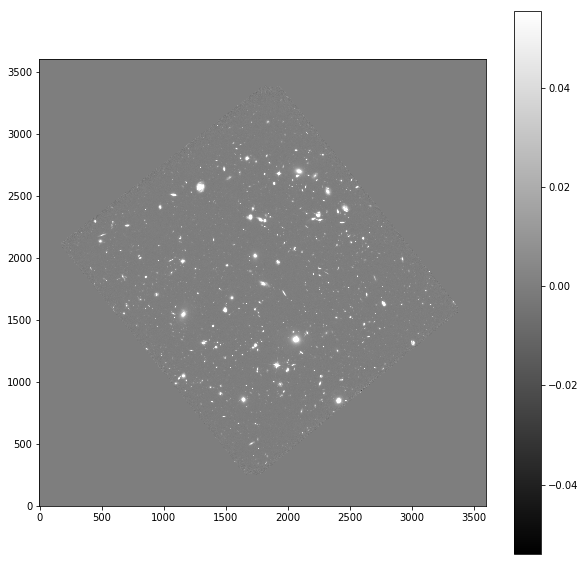

In [5]:
m, s = np.mean(data), np.std(data)
plt.figure(figsize=(10,10))
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [6]:
data = data.byteswap(inplace=True).newbyteorder()
bkg = sep.Background(data, bw=16, bh=16)

In [7]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005099902045913041


In [8]:
bkg_f105w = bkg.back()

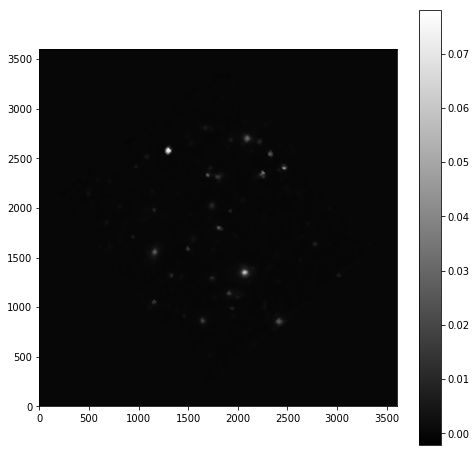

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_f105w, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [10]:
bkg_rms = bkg.rms()

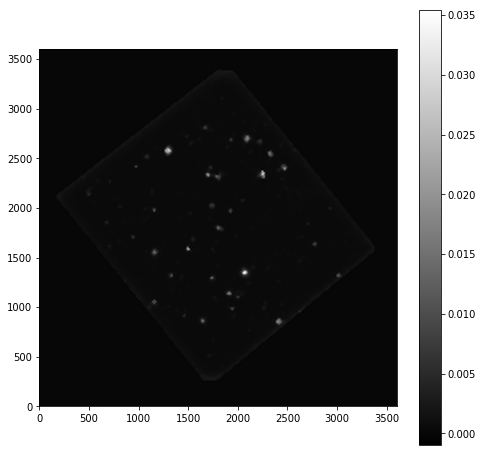

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [12]:
data_sub = data - bkg

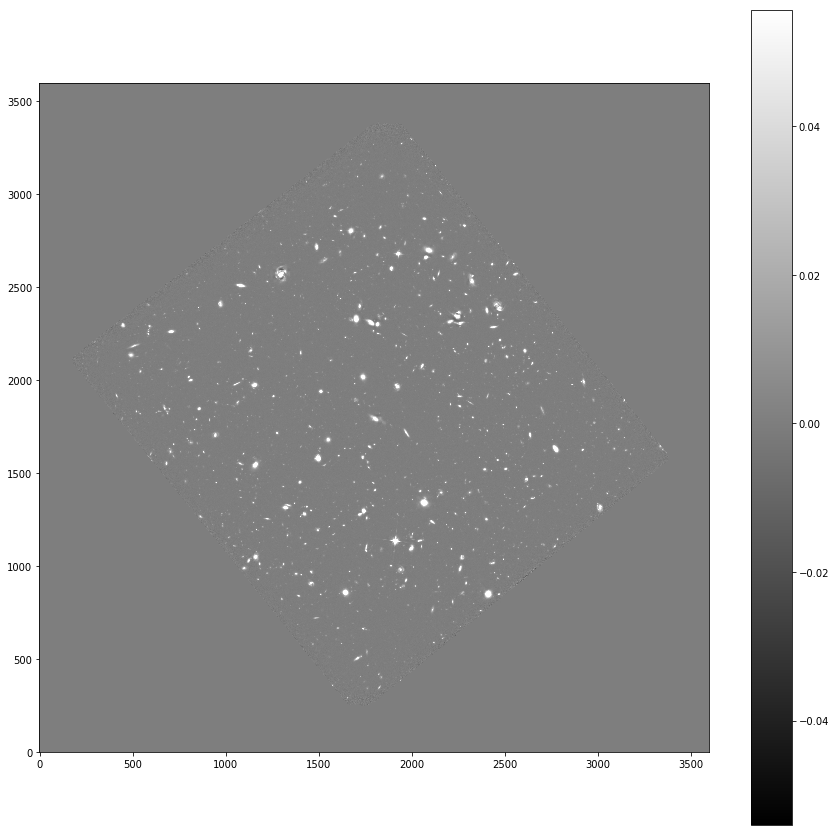

In [13]:
plt.figure(figsize=(15,15))
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

In [14]:
msk = data<=0.02
objects = sep.extract(data_sub, 3, err=bkg.globalrms, mask=msk)

In [15]:
len(objects)

810

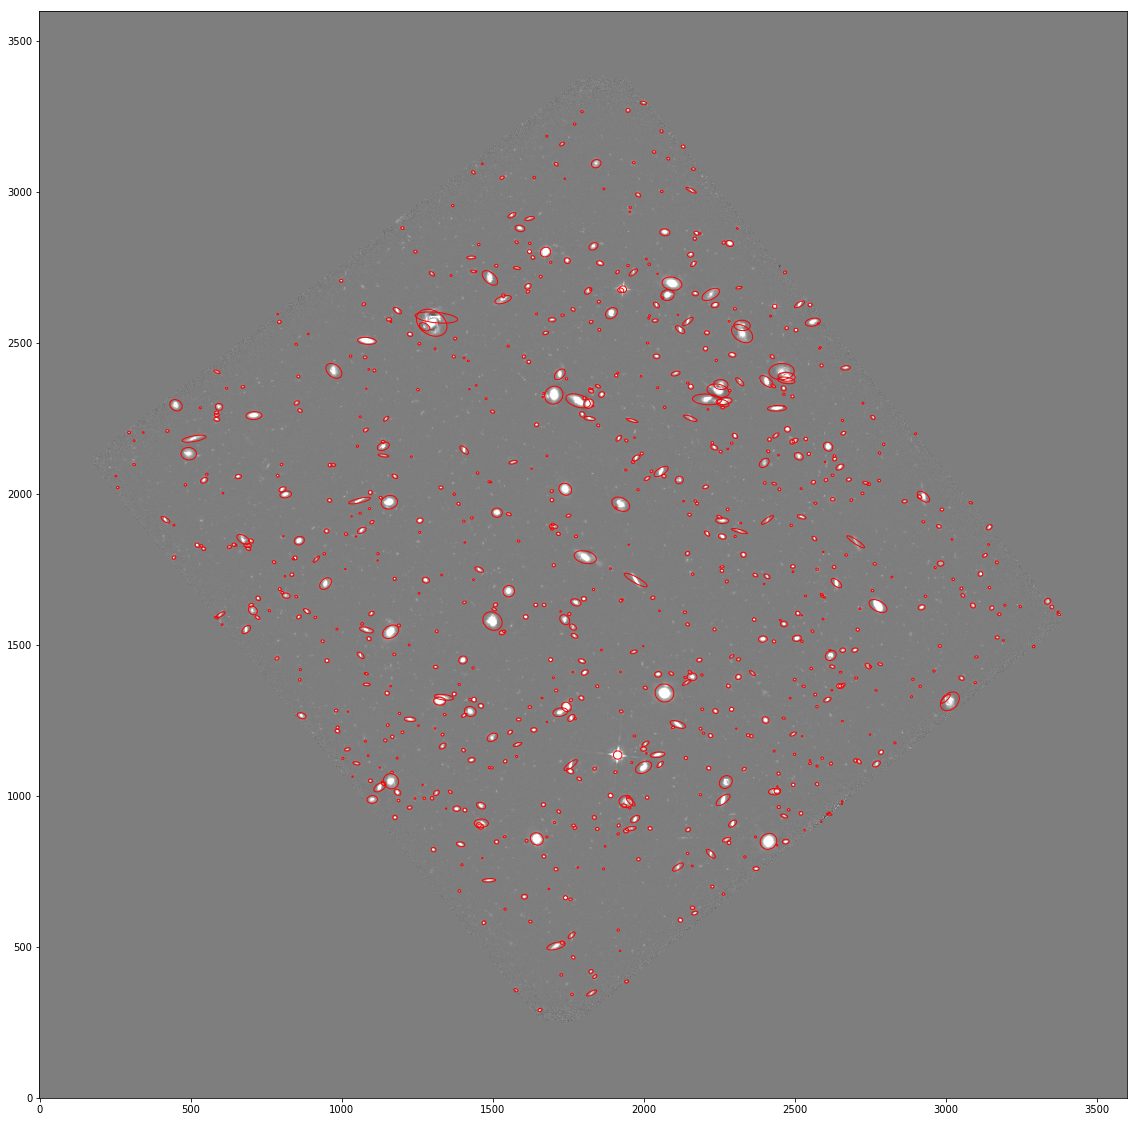

In [16]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(20,20))
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),width=8*objects['a'][i],height=8*objects['b'][i],angle=objects['theta'][i]*180/(2*np.pi))
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [17]:
flux, fluxerr, flag = sep.sum_circle(data_sub,objects['x'],objects['y'],3.0,err=bkg.globalrms,mask=msk, gain=1.0)

In [18]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,flux[i],fluxerr[i]))

object 0: flux = 1.247050 +/- 1.116717
object 1: flux = 0.686795 +/- 0.828735
object 2: flux = 1.114998 +/- 1.055938
object 3: flux = 1.217056 +/- 1.103206
object 4: flux = 0.899049 +/- 0.948186
object 5: flux = 0.823192 +/- 0.907303
object 6: flux = 0.761383 +/- 0.872577
object 7: flux = 1.263850 +/- 1.124214
object 8: flux = 1.067958 +/- 1.033424
object 9: flux = 0.571732 +/- 0.756134


In [19]:
for i in range(810):
    Mags = {}
    Mags[i] = u.Magnitude(flux[i])
    print(Mags)

{0: <Magnitude 1.24705008 mag>}
{1: <Magnitude 0.68679456 mag>}
{2: <Magnitude 1.11499831 mag>}
{3: <Magnitude 1.21705583 mag>}
{4: <Magnitude 0.89904862 mag>}
{5: <Magnitude 0.82319183 mag>}
{6: <Magnitude 0.76138266 mag>}
{7: <Magnitude 1.26384954 mag>}
{8: <Magnitude 1.0679583 mag>}
{9: <Magnitude 0.57173152 mag>}
{10: <Magnitude 3.18421469 mag>}
{11: <Magnitude 0.83105919 mag>}
{12: <Magnitude 1.0527996 mag>}
{13: <Magnitude 0.67878291 mag>}
{14: <Magnitude 1.43656543 mag>}
{15: <Magnitude 0.85556561 mag>}
{16: <Magnitude 2.2282096 mag>}
{17: <Magnitude 1.21308372 mag>}
{18: <Magnitude 0.6362079 mag>}
{19: <Magnitude 0.80476338 mag>}
{20: <Magnitude 0.640895 mag>}
{21: <Magnitude 8.20261571 mag>}
{22: <Magnitude 1.29652715 mag>}
{23: <Magnitude 0.66673601 mag>}
{24: <Magnitude 0.7499287 mag>}
{25: <Magnitude 0.59049103 mag>}
{26: <Magnitude 0.94978142 mag>}
{27: <Magnitude 1.41938108 mag>}
{28: <Magnitude 0.67708784 mag>}
{29: <Magnitude 1.08661626 mag>}
{30: <Magnitude 0.58598227 

{282: <Magnitude 0.74749287 mag>}
{283: <Magnitude 1.3885135 mag>}
{284: <Magnitude 2.86305464 mag>}
{285: <Magnitude 0.84882084 mag>}
{286: <Magnitude 0.57594183 mag>}
{287: <Magnitude 0.64138278 mag>}
{288: <Magnitude 1.17174107 mag>}
{289: <Magnitude 2.29137325 mag>}
{290: <Magnitude 0.58847732 mag>}
{291: <Magnitude 0.82027948 mag>}
{292: <Magnitude 0.75956599 mag>}
{293: <Magnitude 0.64291392 mag>}
{294: <Magnitude 0.82655219 mag>}
{295: <Magnitude 1.15782395 mag>}
{296: <Magnitude 0.73144967 mag>}
{297: <Magnitude 0.60790346 mag>}
{298: <Magnitude 1.26573787 mag>}
{299: <Magnitude 4.93216904 mag>}
{300: <Magnitude 0.94047517 mag>}
{301: <Magnitude 5.64099089 mag>}
{302: <Magnitude 1.56315929 mag>}
{303: <Magnitude 0.77051488 mag>}
{304: <Magnitude 1.03228735 mag>}
{305: <Magnitude 0.69963013 mag>}
{306: <Magnitude 0.65232634 mag>}
{307: <Magnitude 0.62603486 mag>}
{308: <Magnitude 1.03961014 mag>}
{309: <Magnitude 0.92935349 mag>}
{310: <Magnitude 2.9816126 mag>}
{311: <Magnitude

{696: <Magnitude 0.58328402 mag>}
{697: <Magnitude 3.68439631 mag>}
{698: <Magnitude 1.11174292 mag>}
{699: <Magnitude 0.57455181 mag>}
{700: <Magnitude 0.9148555 mag>}
{701: <Magnitude 0.58630464 mag>}
{702: <Magnitude 1.04469435 mag>}
{703: <Magnitude 1.07806587 mag>}
{704: <Magnitude 3.03693513 mag>}
{705: <Magnitude 0.88082967 mag>}
{706: <Magnitude 1.74352677 mag>}
{707: <Magnitude 0.58952912 mag>}
{708: <Magnitude 2.34931034 mag>}
{709: <Magnitude 0.90834376 mag>}
{710: <Magnitude 0.60259711 mag>}
{711: <Magnitude 0.75901972 mag>}
{712: <Magnitude 0.58849906 mag>}
{713: <Magnitude 0.57618501 mag>}
{714: <Magnitude 0.6225316 mag>}
{715: <Magnitude 5.24132973 mag>}
{716: <Magnitude 10.93336826 mag>}
{717: <Magnitude 1.26882891 mag>}
{718: <Magnitude 1.10553814 mag>}
{719: <Magnitude 0.969481 mag>}
{720: <Magnitude 0.75061134 mag>}
{721: <Magnitude 3.73007489 mag>}
{722: <Magnitude 30.06051198 mag>}
{723: <Magnitude 2.01303943 mag>}
{724: <Magnitude 0.8602508 mag>}
{725: <Magnitude 

In [20]:
hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 3600 / Axis length                                    
NAXIS2  =                 3600 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
IRAF-TLM= '2012-12-04T19:12:18' / Time of last modification                     
FILENAME= 'hlsp_candels_hst_hst_hudf12_wfc3ir_f105w_60mas' / MAST HLSP FileName 
OBJECT  = 'HLSP_HUDF12_HST_WFC3IR_UDFMAIN_F105W_60MAS_V1.0_DRZ[1/1]'            
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2012-12-04T19:09:11'                                                 
IRAF-MAX=           7.444648E1  /  DATA MAX                                     
IRAF-MIN=         -9.047293E

In [83]:
sdata = data[1000:2500:1,1100:2600:1]

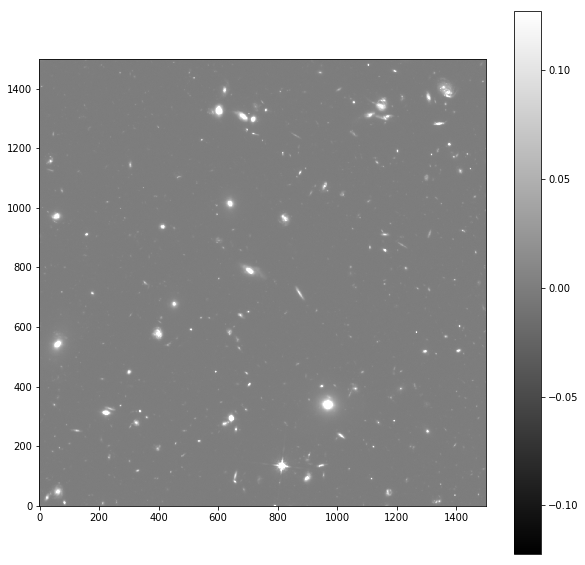

In [84]:
m, s = np.mean(sdata), np.std(sdata)
plt.figure(figsize=(10,10))
plt.imshow(sdata, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [85]:
sdata = sdata.copy(order='C')
sbkg = sep.Background(sdata, bw=16, bh=16)

In [86]:
print(sbkg.globalback)
print(sbkg.globalrms)

1.71442843566183e-05
0.0004961604136042297


In [87]:
sbkg_f105w = sbkg.back()

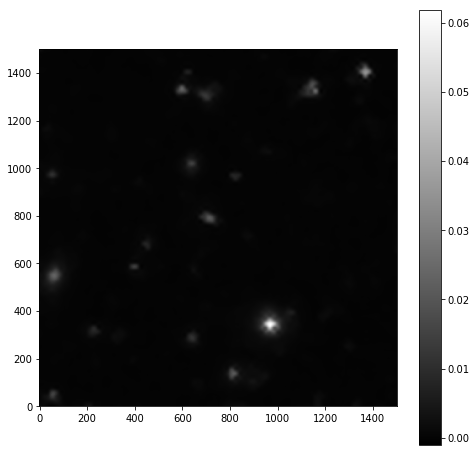

In [88]:
plt.figure(figsize=(8,8))
plt.imshow(sbkg_f105w, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [89]:
sbkg_rms = sbkg.rms()

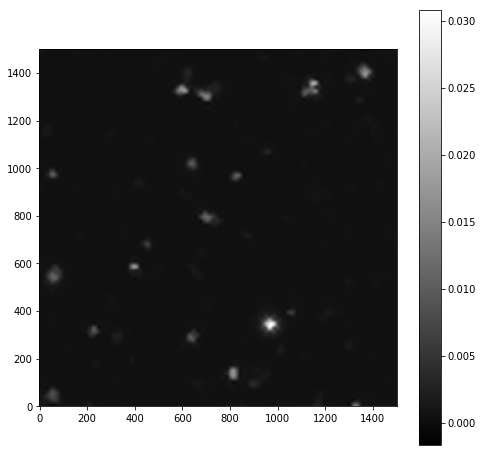

In [90]:
plt.figure(figsize=(8,8))
plt.imshow(sbkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [91]:
sdata_sub = sdata - sbkg

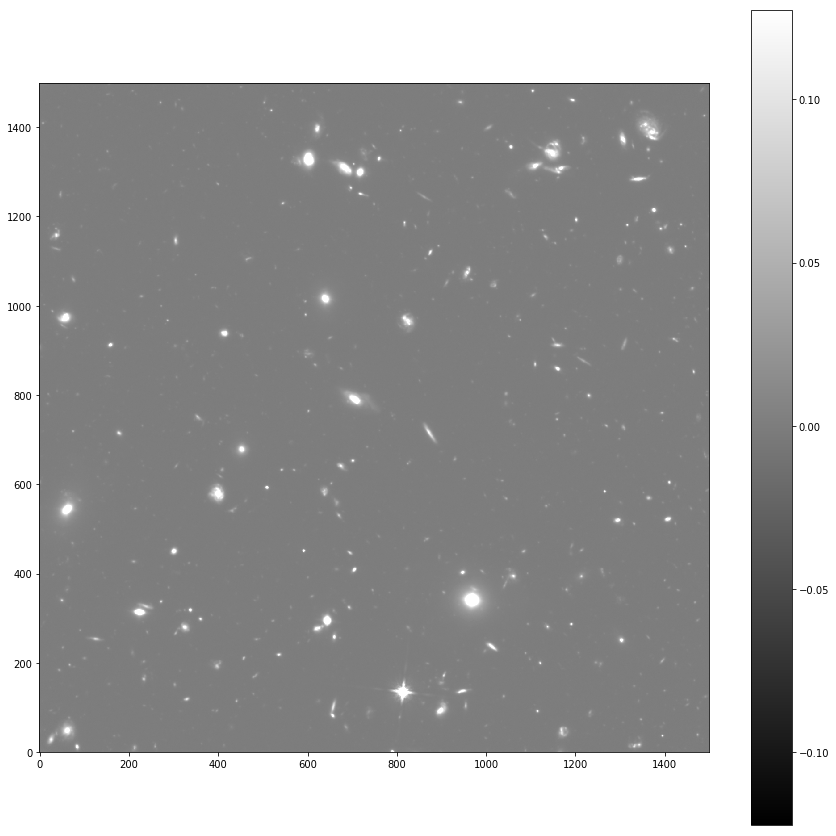

In [92]:
plt.figure(figsize=(15,15))
plt.imshow(sdata, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [108]:
objects = sep.extract(sdata, 10, err=sbkg.globalrms)

In [109]:
len(objects)

732

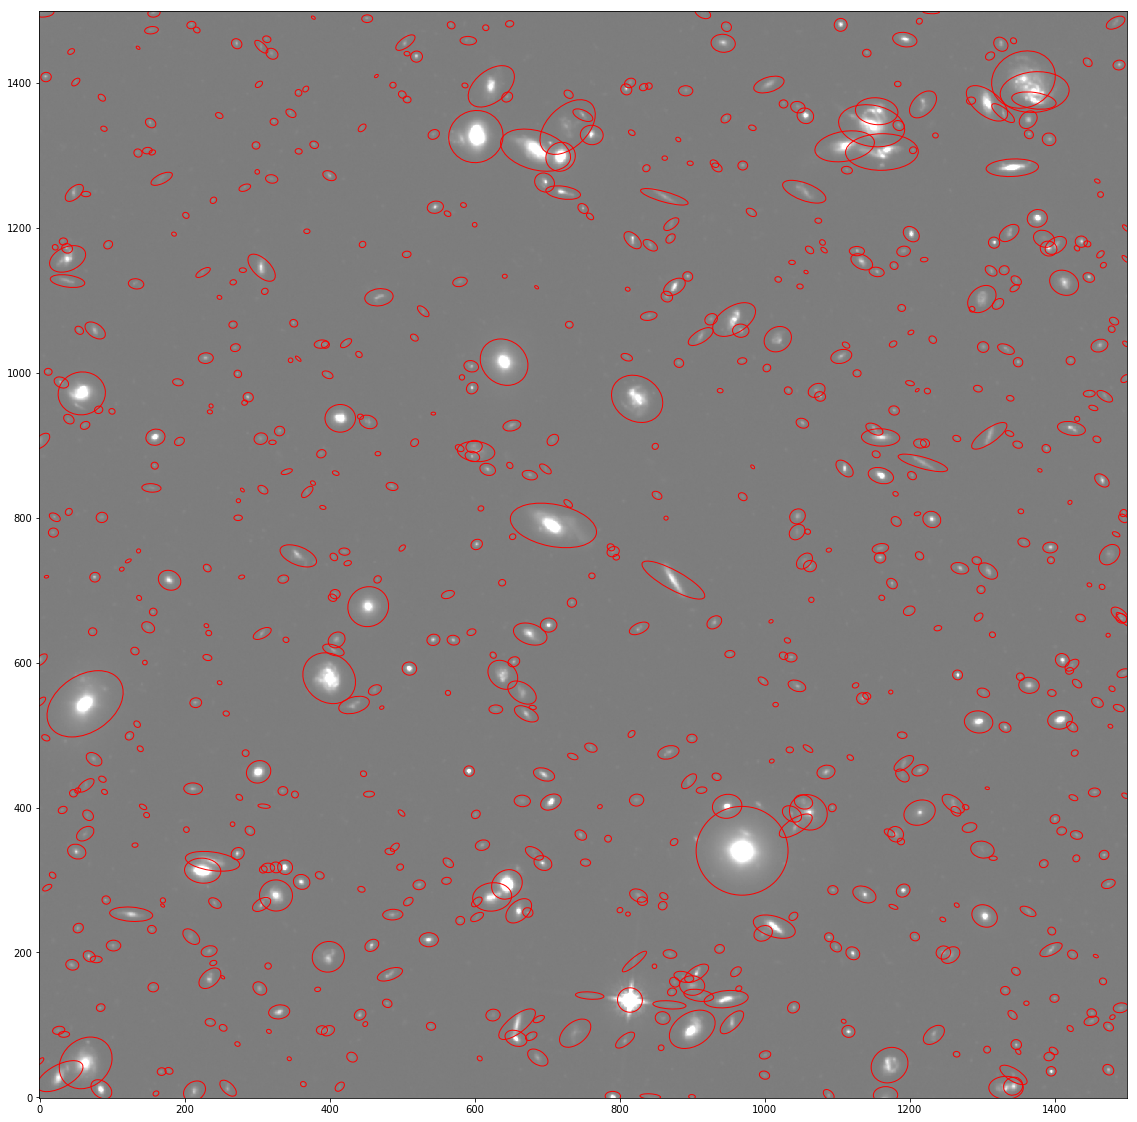

In [110]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(20,20))
m, s = np.mean(sdata), np.std(sdata)
im = ax.imshow(sdata, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),width=8*objects['a'][i],height=8*objects['b'][i],angle=objects['theta'][i]*180/(2*np.pi))
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [114]:
sflux, sfluxerr, sflag = sep.sum_circle(sdata,objects['x'],objects['y'],10.0,err=sbkg.globalrms, gain=1.0)

In [115]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,sflux[i],sfluxerr[i]))

object 0: flux = 0.253875 +/- 0.503906
object 1: flux = 0.725563 +/- 0.851828
object 2: flux = 0.401475 +/- 0.633673
object 3: flux = 7.595182 +/- 2.755945
object 4: flux = 0.852017 +/- 0.923080
object 5: flux = 2.175576 +/- 1.475003
object 6: flux = 4.733228 +/- 2.175616
object 7: flux = 0.563629 +/- 0.750804
object 8: flux = 0.183284 +/- 0.428207
object 9: flux = 1.958122 +/- 1.399357


(array([ 0.,  0.,  0.,  0.,  0.,  3.,  2.,  5., 13.,  9., 10.,  7., 16.,
        19., 17., 15., 20., 12., 10., 17., 13., 14., 11., 16., 11., 10.,
         8., 10.,  7., 12.,  8., 10., 10., 11., 10., 12.,  6.,  7.,  5.,
        10., 10.,  7.,  4.,  5.,  3.,  8.,  5.,  5.,  2.,  6.,  5.,  3.,
         4.,  3.,  8.,  3.,  2.,  2.,  2.,  4.,  3.,  3.,  3.,  3.,  4.,
         0.,  2.,  4.,  3.,  1.,  2.,  1.,  3.,  3.,  0.,  2.,  4.,  5.,
         2.,  3.,  2.,  3.,  1.,  2.,  0.,  2.,  3.,  0.,  3.,  2.,  3.,
         0.,  1.,  2.,  3.,  5.,  1.,  4.,  0.,  2.,  1.,  0.,  0.,  0.,
         2.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  2.,  2.,  1.,  0.,
         2.,  0.,  1.,  2.,  3.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
         2.,  0.,  1.,  0.,  2.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
         1.,  4.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,
         0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.

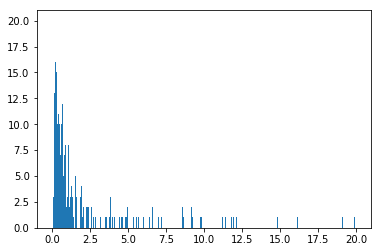

In [121]:
from astropy import visualization as vis

vis.hist(sflux,1000,range=(0,20))